# Data Analysis Assignment - Customer Orders Analysis

### Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [ ]:
customer_orders = pd.read_csv('/content/drive/MyDrive/Supertales/sample_customer_orders.csv', encoding="latin1")
customer_orders.head()

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType
0,7.262650e+12,3.801390e+12,NaN,NaN,13-05-2021 18:02,Vet Consultation - 30 min,1.0,100.0,Supertail,Product
1,7.262650e+12,3.822580e+12,NaN,NaN,25-05-2021 16:54,Consult a Vet - 30 min,1.0,0.0,Services,Product
2,7.262650e+12,3.823980e+12,NaN,NaN,26-05-2021 11:37,Consult a Vet - 30 min,1.0,299.0,Services,Product
3,7.262650e+12,3.824130e+12,NaN,NaN,26-05-2021 14:44,Consult a Vet - 30 min,1.0,299.0,Services,Product
4,7.299310e+12,3.824330e+12,NaN,DFODF0004AC,26-05-2021 18:02,Acana Puppy & Junior Dry Dog Food (All Breeds)...,1.0,349.0,Acana,Product


### Data Understanding

In [ ]:
customer_orders.shape

(699943, 10)

In [ ]:
customer_orders.isna().sum()

,0
customer_id,199931
order_id,199931
productId,203149
sku,202556
Order_date,199931
productName,199931
quantity,199931
sellingPrice,199931
vendor,200820
productType,199931


In [ ]:
customer_orders.duplicated().sum()

201314

In [ ]:
customer_orders.describe(include='all')

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType
count,5.000120e+05,5.000120e+05,4.967940e+05,497387,500012,500012,500012.000000,500012.000000,499123,500012
unique,NaN,NaN,NaN,12628,148900,20385,NaN,NaN,357,4
top,NaN,NaN,NaN,DFODF0006HNREW,13-06-2023 18:30,Henlo Baked Dry Food for Adult Dogs Special Of...,NaN,NaN,Pedigree,Product
freq,NaN,NaN,NaN,9329,89,9327,NaN,NaN,39382,401168
mean,8.312064e+12,5.408886e+12,7.417153e+12,NaN,NaN,NaN,1.181104,926.060529,NaN,NaN
std,3.389111e+11,3.193594e+11,5.675237e+11,NaN,NaN,NaN,5.845628,2340.532779,NaN,NaN
min,7.262620e+12,3.801390e+12,6.676710e+12,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,8.102630e+12,5.239020e+12,6.746650e+12,NaN,NaN,NaN,1.000000,108.000000,NaN,NaN
50%,8.337110e+12,5.456860e+12,7.617710e+12,NaN,NaN,NaN,1.000000,425.000000,NaN,NaN
75%,8.566700e+12,5.658750e+12,7.962530e+12,NaN,NaN,NaN,1.000000,1080.000000,NaN,NaN


In [ ]:
quantitative_features=customer_orders.select_dtypes(exclude='object')
quantitative_features.head()

,customer_id,order_id,productId,quantity,sellingPrice
0,7.262650e+12,3.801390e+12,NaN,1.0,100.0
1,7.262650e+12,3.822580e+12,NaN,1.0,0.0
2,7.262650e+12,3.823980e+12,NaN,1.0,299.0
3,7.262650e+12,3.824130e+12,NaN,1.0,299.0
4,7.299310e+12,3.824330e+12,NaN,1.0,349.0


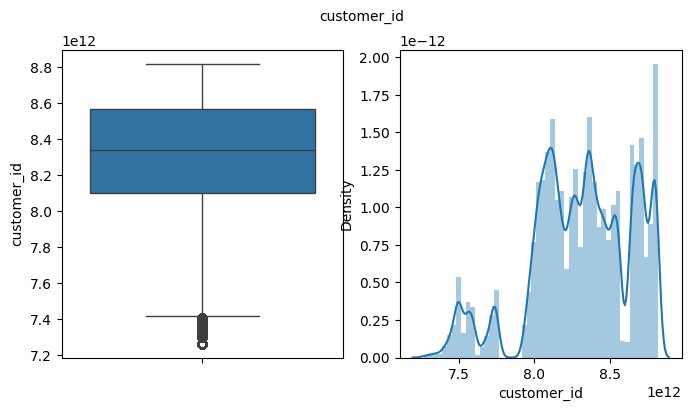

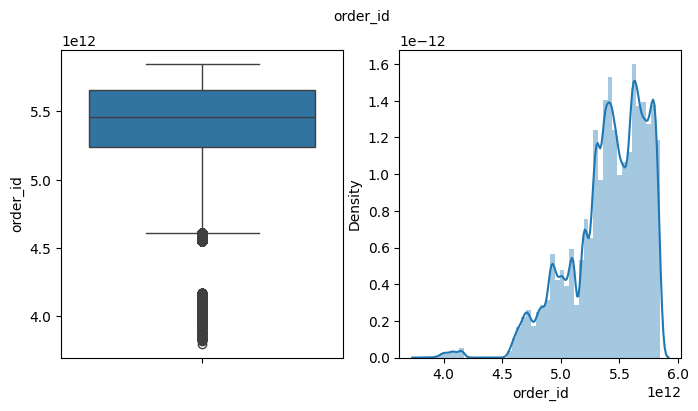

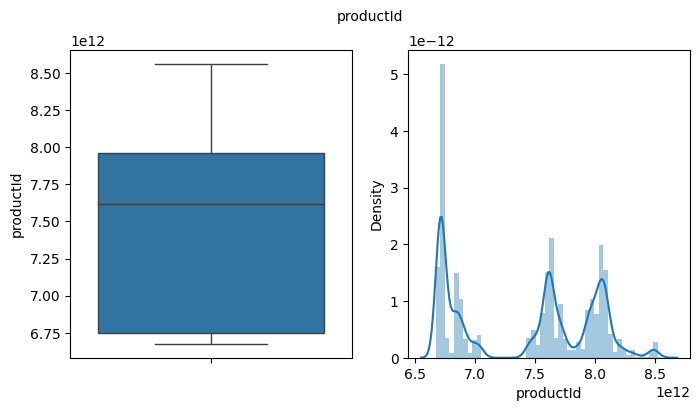

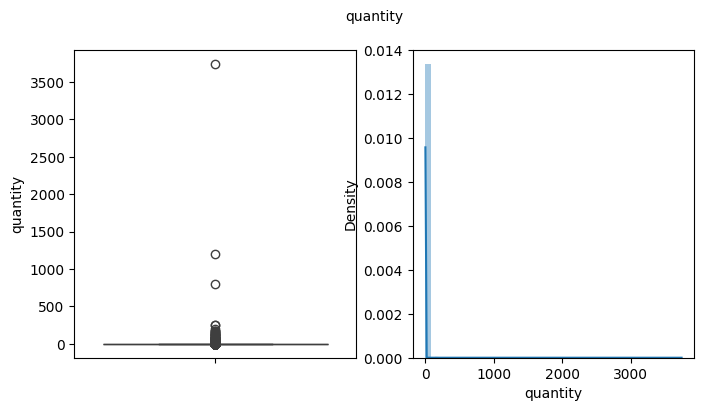

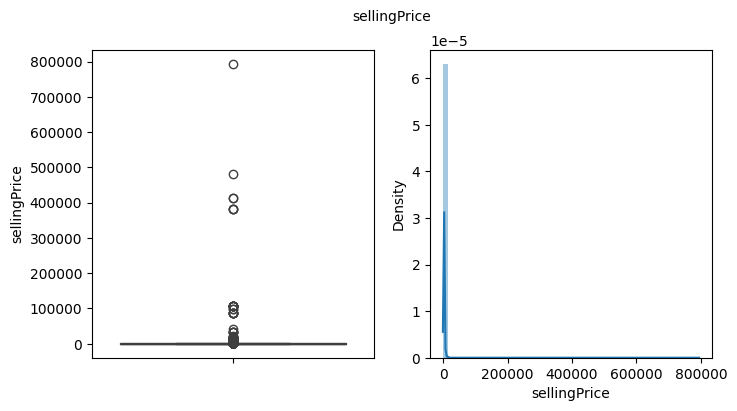

In [ ]:
for i in quantitative_features:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.boxplot(y=i,data=customer_orders)
    plt.subplot(1,2,2)
    sns.distplot(a=customer_orders[i])
    plt.suptitle(i, size=10)
    plt.show()

### Data Preprocessing

In [ ]:
#Removing null values
customer_orders.dropna(inplace=True)

In [ ]:
#Removing duplicates
customer_orders.drop_duplicates(inplace=True)

In [ ]:
customer_orders.shape

(494531, 10)

In [ ]:
#Converting order_date to Date_time type
customer_orders['order_date'] = pd.to_datetime(customer_orders['Order_date'], format="%d-%m-%Y %H:%M", errors="coerce")


### Making necessary columns and tables for Required Analysis

In [ ]:
sample_data = customer_orders[customer_orders['sellingPrice'] == 0]
sample_data.head()

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType,order_date
1218,7.399020e+12,4.052080e+12,6.831570e+12,DTR0002,07-09-2021 20:21,Pre-Training Consultation - 30 min,1.0,0.0,Services,Product,2021-09-07 20:21:00
1250,7.557920e+12,4.056060e+12,6.676710e+12,DHC0002,09-09-2021 17:48,Follow Up - 15 min,1.0,0.0,Services,Service,2021-09-09 17:48:00
1251,7.558320e+12,4.056140e+12,6.831570e+12,DTR0002,09-09-2021 18:46,Pre-Training Consultation - 30 min,1.0,0.0,Services,Product,2021-09-09 18:46:00
1267,7.559420e+12,4.057370e+12,6.831570e+12,DTR0002,10-09-2021 07:18,Pre-Training Consultation - 30 min,1.0,0.0,Services,Product,2021-09-10 07:18:00
1275,7.559830e+12,4.057790e+12,6.831570e+12,DTR0002,10-09-2021 14:02,Pre-Training Consultation - 30 min,1.0,0.0,Services,Product,2021-09-10 14:02:00


In [ ]:
customer_detail_orders = customer_orders.merge(sample_data[['customer_id', 'vendor', 'productName', 'order_date']],
                      on='customer_id', suffixes=('', '_sample'), how='left')
customer_detail_orders.head()

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType,order_date,vendor_sample,productName_sample,order_date_sample
0,7.418790e+12,3.938970e+12,6.716710e+12,CFODF0008WH,11-07-2021 11:15,Whiskas Tuna Flavour Adult Dry Cat Food - 3Kg,1.0,770.0,Products,Product,2021-07-11 11:15:00,Drools,Drools Cat Biscuit - 40g,2022-06-27 20:01:00
1,7.418790e+12,3.938970e+12,6.716710e+12,CFODF0008WH,11-07-2021 11:15,Whiskas Tuna Flavour Adult Dry Cat Food - 3Kg,1.0,770.0,Products,Product,2021-07-11 11:15:00,Royal Canin,Royal Canin Indoor Adult Cat Dry Food (Sample)...,2022-12-04 10:48:00
2,7.418790e+12,3.938970e+12,6.716710e+12,CFODF0008WH,11-07-2021 11:15,Whiskas Tuna Flavour Adult Dry Cat Food - 3Kg,1.0,770.0,Products,Product,2021-07-11 11:15:00,Royal Canin,Royal Canin Indoor Adult Cat Dry Food - 50g,2023-02-28 13:51:00
3,7.418790e+12,3.938970e+12,6.716710e+12,CFODF0008WH,11-07-2021 11:15,Whiskas Tuna Flavour Adult Dry Cat Food - 3Kg,1.0,770.0,Products,Product,2021-07-11 11:15:00,Royal Canin,Royal Canin Indoor Adult Cat Dry Food - 50g,2023-03-27 16:46:00
4,7.418790e+12,3.938970e+12,6.716710e+12,CFODF0008WH,11-07-2021 11:15,Whiskas Tuna Flavour Adult Dry Cat Food - 3Kg,1.0,770.0,Products,Product,2021-07-11 11:15:00,Royal Canin,Royal Canin Indoor Adult Cat Dry Food,2023-05-17 14:13:00


### Brand Loyalty

In [ ]:
brand_loyalty = customer_detail_orders[(customer_detail_orders['vendor'] == customer_detail_orders['vendor_sample']) &
                          (customer_detail_orders['order_date'] > customer_detail_orders['order_date_sample'])]
brand_loyalty.head()

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType,order_date,vendor_sample,productName_sample,order_date_sample
13980,7.558320e+12,4.061600e+12,6.831570e+12,DTR0007,12-09-2021 13:58,Basic Obedience Training - 60 min,1.0,299.0,Services,Product,2021-09-12 13:58:00,Services,Pre-Training Consultation - 30 min,2021-09-09 18:46:00
14284,7.559420e+12,4.063570e+12,6.831570e+12,DTR0007,13-09-2021 18:24,Basic Obedience Training - 60 min,1.0,299.0,Services,Product,2021-09-13 18:24:00,Services,Pre-Training Consultation - 30 min,2021-09-10 07:18:00
14285,7.559420e+12,4.063570e+12,6.831570e+12,DTR0005,13-09-2021 18:24,Potty Training - 60 min,1.0,299.0,Services,Product,2021-09-13 18:24:00,Services,Pre-Training Consultation - 30 min,2021-09-10 07:18:00
17517,7.405900e+12,4.075870e+12,6.714490e+12,DHC0001,20-09-2021 12:31,Consult a Vet - 30 min,1.0,299.0,Services,Service,2021-09-20 12:31:00,Services,Follow Up - 15 min,2021-09-12 12:44:00
17867,7.405900e+12,4.079470e+12,6.676710e+12,DHC0002,22-09-2021 13:18,Follow Up - 15 min,1.0,0.0,Services,Service,2021-09-22 13:18:00,Services,Follow Up - 15 min,2021-09-12 12:44:00


### Product Loyalty

In [ ]:
product_loyalty = customer_detail_orders[(customer_detail_orders['productName'] == customer_detail_orders['productName_sample']) &
                             (customer_detail_orders['order_date'] > customer_detail_orders['order_date_sample'])]
product_loyalty.head()

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType,order_date,vendor_sample,productName_sample,order_date_sample
17867,7.405900e+12,4.079470e+12,6.676710e+12,DHC0002,22-09-2021 13:18,Follow Up - 15 min,1.0,0.0,Services,Service,2021-09-22 13:18:00,Services,Follow Up - 15 min,2021-09-12 12:44:00
17990,7.584660e+12,4.081230e+12,6.676710e+12,DHC0002,23-09-2021 13:21,Follow Up - 15 min,1.0,0.0,Services,Service,2021-09-23 13:21:00,Services,Follow Up - 15 min,2021-09-21 14:23:00
18026,7.580170e+12,4.081380e+12,6.676710e+12,DHC0002,23-09-2021 16:11,Follow Up - 15 min,1.0,0.0,Services,Service,2021-09-23 16:11:00,Services,Follow Up - 15 min,2021-09-19 20:55:00
20615,7.604450e+12,4.096030e+12,6.831570e+12,DTR0002,30-09-2021 18:46,Pre-Training Consultation - 15 min,1.0,0.0,Services,Product,2021-09-30 18:46:00,Services,Pre-Training Consultation - 15 min,2021-09-29 21:50:00
20792,7.405900e+12,4.097810e+12,6.676710e+12,DHC0002,01-10-2021 13:19,Follow Up - 15 min,1.0,0.0,Services,Service,2021-10-01 13:19:00,Services,Follow Up - 15 min,2021-09-12 12:44:00


In [ ]:
# Calculate conversion time
brand_loyalty['conversion_time'] = (brand_loyalty['order_date'] - brand_loyalty['order_date_sample']).dt.days
product_loyalty['conversion_time'] = (product_loyalty['order_date'] - product_loyalty['order_date_sample']).dt.days


### Average Conversion Time

In [ ]:
# Calculate average conversion time
avg_conversion_brand = brand_loyalty['conversion_time'].mean()
avg_conversion_product = product_loyalty['conversion_time'].mean()

In [ ]:
print(f'Average conversion time for brand loyalty: {avg_conversion_brand:.2f} days')
print(f'Average conversion time for product loyalty: {avg_conversion_product:.2f} days')

Average conversion time for brand loyalty: 173.56 days
Average conversion time for product loyalty: 90.24 days


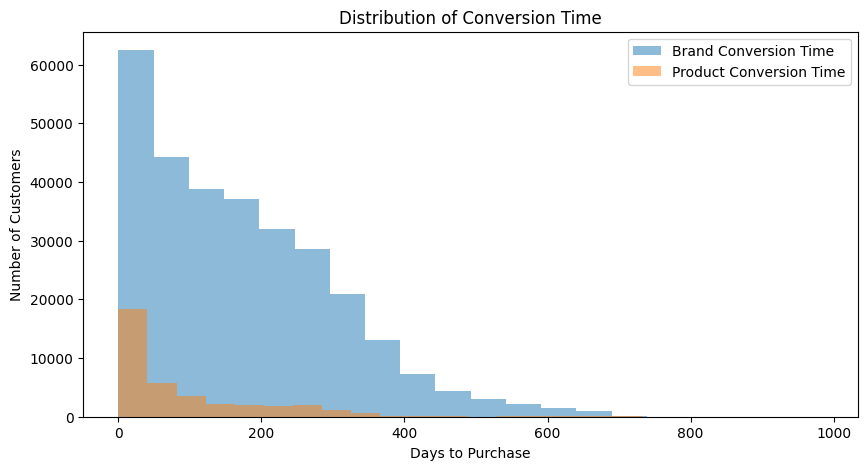

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(brand_loyalty['conversion_time'].dropna(), bins=20, alpha=0.5, label='Brand Conversion Time')
plt.hist(product_loyalty['conversion_time'].dropna(), bins=20, alpha=0.5, label='Product Conversion Time')
plt.xlabel('Days to Purchase')
plt.ylabel('Number of Customers')
plt.legend()
plt.title('Distribution of Conversion Time')
plt.show()

### Conversion Rates

In [ ]:
brand_conversion_rate = brand_loyalty['customer_id'].nunique() / sample_data['customer_id'].nunique() * 100
product_conversion_rate = product_loyalty['customer_id'].nunique() / sample_data['customer_id'].nunique() * 100

In [ ]:
print(f"Brand Loyalty Rate: {brand_conversion_rate:.2f}%")
print(f"Product Loyalty Rate: {product_conversion_rate:.2f}%")

Brand Loyalty Rate: 78.77%
Product Loyalty Rate: 52.81%
